In [31]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import math

In [32]:
with open('data.txt','r') as f:
    lg_data=list()
    for line in f.readlines():
        line = eval(line)
        lg_data.append(line)
final_data=list()
data=defaultdict(list)
for game in lg_data:
    for i in range(len(game)):
        data[game[i][1]].append(len(game)-i)
for point in data.keys():
    data[point] = sum(data[point])/len(data[point])

for k,v in data.items():
    final_data.append((k,v))
print(final_data)

[(12.54, 3.7675), (7.95, 2.8958333333333335), (2.25, 2.0), (0.01, 1.0), (5.55, 2.7142857142857144), (1.95, 1.6666666666666667), (0.83, 1.5), (5.22, 2.3333333333333335), (2.18, 2.0), (0.33, 1.5), (4.21, 2.625), (1.72, 2.0), (0.29, 1.6666666666666667), (0.0, 1.0), (5.89, 2.6315789473684212), (2.95, 2.0), (6.98, 2.7083333333333335), (4.36, 2.0), (0.99, 1.2), (7.11, 2.8125), (3.51, 1.8888888888888888), (0.11, 1.0), (4.61, 2.0), (0.28, 1.0), (2.08, 1.8), (6.68, 2.25), (1.0, 1.2222222222222223), (1.56, 1.5), (5.15, 2.6666666666666665), (1.2, 1.0), (1.51, 2.0), (0.02, 1.3333333333333333), (3.58, 2.0), (0.06, 1.0), (1.98, 1.75), (2.09, 1.5), (6.26, 2.7142857142857144), (1.14, 2.0), (1.03, 2.0), (1.59, 1.3333333333333333), (0.81, 1.0), (2.55, 1.8), (2.67, 2.0), (0.34, 2.0), (1.08, 1.6666666666666667), (1.58, 2.0), (4.08, 2.0), (0.91, 1.3333333333333333), (3.69, 2.4), (1.41, 2.0), (0.77, 1.5), (3.57, 1.5), (3.18, 2.3333333333333335), (0.7, 2.0), (3.84, 2.5), (2.33, 2.25), (0.04, 1.33333333333333

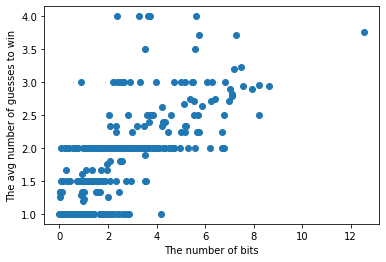

In [33]:
x=list(t[0] for t in final_data)
y=list(t[1] for t in final_data)
plt.scatter(x,y)
plt.xlabel('The number of bits')
plt.ylabel('The avg number of guesses to win')
plt.show()

In [34]:
x_train=np.array(x)
y_train=np.array(y)

In [35]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [36]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [37]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [38]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.67e+00  dj_dw: -5.995e+00, dj_db: -1.898e+00   w:  5.995e-02, b: 1.89760e-02
Iteration 1000: Cost 1.29e-01  dj_dw:  3.003e-03, dj_db: -1.223e-02   w:  2.420e-01, b: 1.24344e+00
Iteration 2000: Cost 1.29e-01  dj_dw:  9.151e-05, dj_db: -3.727e-04   w:  2.336e-01, b: 1.27735e+00
Iteration 3000: Cost 1.29e-01  dj_dw:  2.789e-06, dj_db: -1.136e-05   w:  2.334e-01, b: 1.27838e+00
Iteration 4000: Cost 1.29e-01  dj_dw:  8.498e-08, dj_db: -3.461e-07   w:  2.334e-01, b: 1.27841e+00
Iteration 5000: Cost 1.29e-01  dj_dw:  2.589e-09, dj_db: -1.055e-08   w:  2.334e-01, b: 1.27842e+00
Iteration 6000: Cost 1.29e-01  dj_dw:  7.891e-11, dj_db: -3.213e-10   w:  2.334e-01, b: 1.27842e+00
Iteration 7000: Cost 1.29e-01  dj_dw:  2.405e-12, dj_db: -9.792e-12   w:  2.334e-01, b: 1.27842e+00
Iteration 8000: Cost 1.29e-01  dj_dw:  7.423e-14, dj_db: -2.982e-13   w:  2.334e-01, b: 1.27842e+00
Iteration 9000: Cost 1.29e-01  dj_dw:  1.325e-15, dj_db: -1.107e-14   w:  2.334e-01, b: 1.27842e+00


In [39]:
def function_f(x):
    return w_final*x + b_final